<a href="https://colab.research.google.com/github/kajalb23/Air-Pollution-/blob/main/LSTM/AirPollution/AirPollutionMultivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

def parse(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')  # Format seen in your screenshot

dataset = pd.read_csv(
    '/content/LSTM-Multivariate_pollution.csv',
    parse_dates=['date'],
    date_parser=parse
)

dataset.set_index('date', inplace=True)  # Optional: if you want to use date as index
print(dataset.head())


/tmp/ipython-input-2-2701498430.py:9: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = pd.read_csv(


                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [3]:
dataset.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [4]:
# Data cleaning


dataset['pollution'].fillna(0, inplace=True)
dataset = dataset[24:] # drop the first day
print(dataset.head(5))
dataset.to_csv('pollution.csv') # save new CSV

/tmp/ipython-input-4-3123590673.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['pollution'].fillna(0, inplace=True)


                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-03 00:00:00       90.0   -7  -6.0  1027.0      SE    58.56     4     0
2010-01-03 01:00:00       63.0   -8  -6.0  1026.0      SE    61.69     5     0
2010-01-03 02:00:00       65.0   -8  -7.0  1026.0      SE    65.71     6     0
2010-01-03 03:00:00       55.0   -8  -7.0  1025.0      SE    68.84     7     0
2010-01-03 04:00:00       65.0   -8  -7.0  1024.0      SE    72.86     8     0


In [5]:
# load dataset
print('pollution.csv')
df = pd.read_csv('pollution.csv', header=0, index_col=0)
print(df.head() )

pollution.csv
                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-03 00:00:00       90.0   -7  -6.0  1027.0      SE    58.56     4     0
2010-01-03 01:00:00       63.0   -8  -6.0  1026.0      SE    61.69     5     0
2010-01-03 02:00:00       65.0   -8  -7.0  1026.0      SE    65.71     6     0
2010-01-03 03:00:00       55.0   -8  -7.0  1025.0      SE    68.84     7     0
2010-01-03 04:00:00       65.0   -8  -7.0  1024.0      SE    72.86     8     0


In [6]:
dataset_columns = df.columns.tolist()
dataset_columns

['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

In [7]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-03 00:00:00,90.0,-7,-6.0,1027.0,SE,58.56,4,0
2010-01-03 01:00:00,63.0,-8,-6.0,1026.0,SE,61.69,5,0
2010-01-03 02:00:00,65.0,-8,-7.0,1026.0,SE,65.71,6,0
2010-01-03 03:00:00,55.0,-8,-7.0,1025.0,SE,68.84,7,0
2010-01-03 04:00:00,65.0,-8,-7.0,1024.0,SE,72.86,8,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


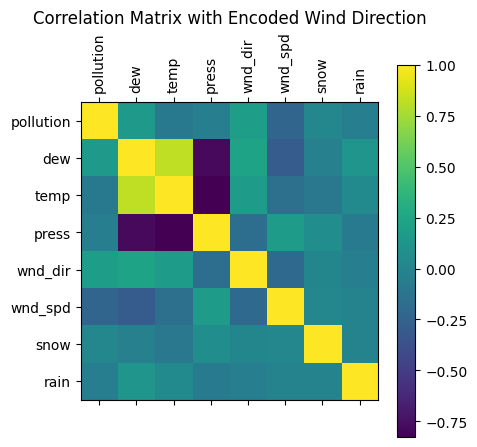

In [8]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
df_encoded['wnd_dir'] = LabelEncoder().fit_transform(df_encoded['wnd_dir'])

plt.matshow(df_encoded.corr())
plt.xticks(range(len(df_encoded.columns)), df_encoded.columns, rotation=90)
plt.yticks(range(len(df_encoded.columns)), df_encoded.columns)
plt.colorbar()
plt.title("Correlation Matrix with Encoded Wind Direction")
plt.show()


In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = df.values
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
values = values.astype('float32')
values[:,4]

array([2., 2., 2., ..., 1., 1., 1.], dtype=float32)

In [10]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [11]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])

  return X,Y

In [12]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)


Y (43772, 1)
X (43772, 4, 8)


In [13]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (35012, 4, 8)
X_test (8760, 4, 8)
Y_train (35012, 1)
Y_test (8760, 1)


In [14]:
#Importing LSTM model
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
#Train the model
model.fit(X_train, Y_train, epochs = 20, batch_size = 32)

Epoch 1/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - loss: 0.0031
Epoch 2/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 0.0012
Epoch 3/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 9.4109e-04
Epoch 4/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8.5353e-04
Epoch 5/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8.5643e-04
Epoch 6/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8.3963e-04
Epoch 7/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 8.4278e-04
Epoch 8/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 8.4851e-04
Epoch 9/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 8.2488e-04
Epoch 10/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 7.9570e-04
Epoch 11/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 8.7231e-04
Epoch 12/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 7.8648e-04
Epoch 13/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 7.8795e-04
Epoch 14/20
1095/1095 ━━━━━━━━━━━━━━━━━━━━ 11s

In [16]:
Y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_pred)

rmse = np.sqrt(mse)
rmse

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.float64(0.029269759226083887)

In [17]:
#Y_predicted = scaler.inverse_transform(Y_pred)
print('y_predicted',Y_pred.shape)
#print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)
print('scaled Values shape', scaled_dataset.shape)

y_predicted (8760, 1)
X_test (8760, 4, 8)
scaled Values shape (43776, 8)


In [18]:
#Scaling back to the original scale
d = scaled_dataset[:8760,:]
print('dummy',d.shape)
print('Y_pred',Y_pred.shape)
Y_predicted = np.concatenate((Y_pred,d[:8760,1:]), axis =1)
print('concat y_pred',Y_pred.shape)
Y_tested = np.concatenate((Y_test, d[:8760,1:]), axis = 1)
print('concat Y_test', Y_test.shape)

dummy (8760, 8)
Y_pred (8760, 1)
concat y_pred (8760, 1)
concat Y_test (8760, 1)


In [19]:
Y_predicted = scaler.inverse_transform(Y_predicted)
Y_tested = scaler.inverse_transform(Y_tested)
Y_predicted = Y_predicted[:,0:1]
Y_tested = Y_tested[:,0:1]
print('Y_tested', Y_tested.shape)
print('Y_predicted', Y_predicted.shape)

Y_tested (8760, 1)
Y_predicted (8760, 1)


In [20]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_tested, Y_predicted)

rmse = np.sqrt(mse)
rmse

np.float64(29.09414020280759)

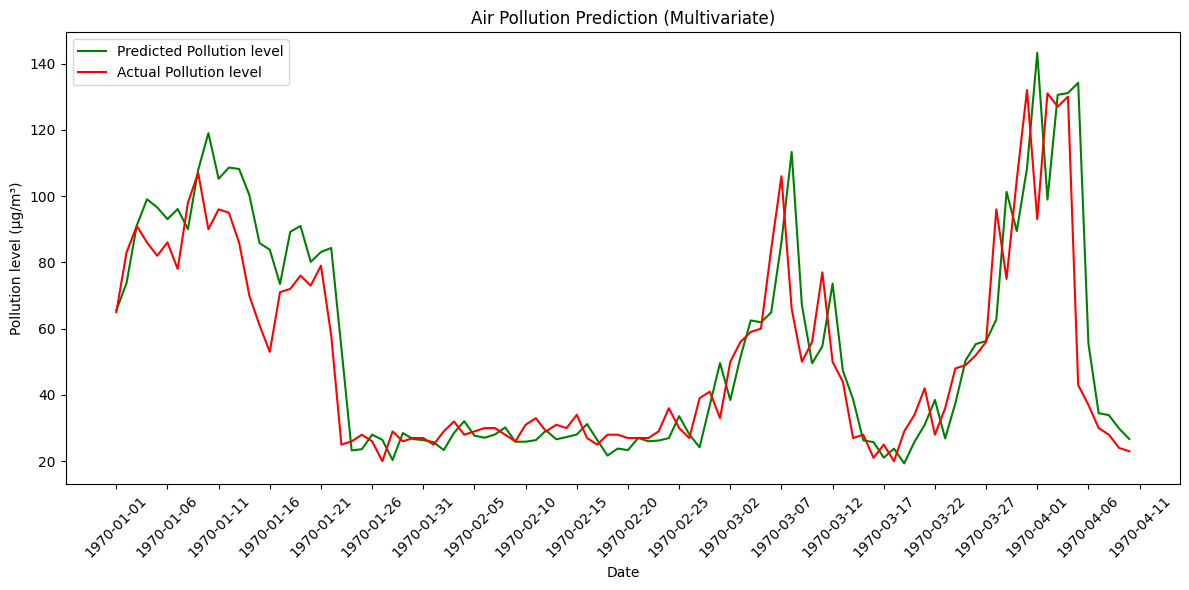

In [21]:
import matplotlib.dates as mdates

# Recalculate correct date range based on test set
window_size = 4
test_start_index = n_train + window_size
test_dates = df.index[test_start_index:test_start_index + len(Y_tested)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_dates[:100], Y_predicted[:100, 0], color='green', label='Predicted Pollution level')
plt.plot(test_dates[:100], Y_tested[:100, 0], color='red', label='Actual Pollution level')

# Format x-axis as date
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=5))  # Show one tick every 5 days

plt.title("Air Pollution Prediction (Multivariate)")
plt.xlabel("Date")
plt.ylabel("Pollution level (µg/m³)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('graph.png')
plt.show()


In [22]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_idx = y_true != 0
    return np.mean(np.abs((y_true[non_zero_idx] - y_pred[non_zero_idx]) / y_true[non_zero_idx])) * 100


mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
print('MAPE', mape)


MAPE 23.00669


In [25]:
from sklearn.metrics import mean_squared_error,r2_score

r2 = r2_score(Y_tested, Y_predicted)
print("R² score:", r2)

mse = mean_squared_error(Y_tested, Y_predicted)
print('Mean squared error', mse)

print('RMSE' , np.sqrt(mse))
print("Mean of Test data ", np.mean(Y_tested))

R² score: 0.9019261598587036
Mean squared error 846.468994140625
RMSE 29.09414020280759
Mean of Test data  95.81153
